In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple, Dict

In [23]:
def get_intensities(image: np.array) -> Dict[int, int]:
    """
    Retorna a quantidade de pixels com a mesma intensidade.
    Funçao utilizada para equalizar o histograma da imagem.
    """
    new_intensities = [0 for i in range(256)]

    m, n = image.shape

    for i in range(m):
        for j in range(n):
            new_intensities[image[i][j]] += 1

    return new_intensities


def image_histogram(image: np.array, ax: Axes = None) -> None:
    """
    Plota um histograma de uma imagem 'uint8' informada como
    um np.array.
    """
    histogram = {i: 0 for i in range(256)}

    for row in image:
        for pixel in row:
            histogram[pixel] += 1

    if ax is None:
        plt.bar(histogram.keys(), histogram.values())
    else:
        ax.bar(histogram.keys(), histogram.values())
    plt.show()


def plot_histogram_comparision(
    im0: np.array,
    im1: np.array,
    titles: Tuple[str, str] = ('', '')) -> None:
    """
    Plota um subplot com as duas imagens informadas. O parâmetro
    de títulos é opcional.
    """
    histogram_im0 = {i: 0 for i in range(256)}

    for row in im0:
        for pixel in row:
            histogram_im0[pixel] += 1

    histogram_im1 = {i: 0 for i in range(256)}

    for row in im1:
        for pixel in row:
            histogram_im1[pixel] += 1

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].bar(histogram_im0.keys(), histogram_im0.values())
    axs[0].set_title(titles[0])
    axs[1].bar(histogram_im1.keys(), histogram_im1.values())
    axs[1].set_title(titles[1])
    plt.show()


def plot_comparision(
    im0: np.array,
    im1: np.array,
    titles: Tuple[str, str] = ('', '')) -> None:
    """
    Plota um subplot com as duas imagens informadas. O parâmetro
    de títulos é opcional.
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(im0, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title(titles[0])
    axs[1].imshow(im1, cmap='gray', vmin=0, vmax=255)
    axs[1].set_title(titles[1])
    plt.show()

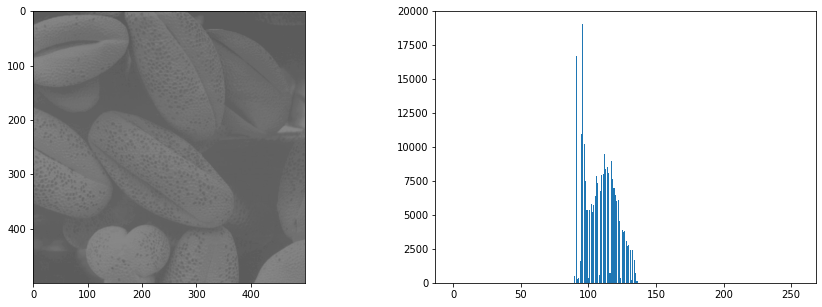

In [24]:
image = plt.imread('../images/Fig3.15(a).jpg').astype('uint8')

# Plota a imagem e o seu histograma
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
image_histogram(image, axs[1])
plt.show()

In [25]:
def equalize_image(image: np.array) -> np.array:
    """
    Faz a equalização de histograma da imagem informada.
    """
    M, N = image.shape
    intensities = get_intensities(image)
    probabilities = {i: n/(M*N) for i, n in enumerate(intensities)}
    probabilities_list = list(probabilities.values())

    # Calcula a probabilidade acumulada de cada intensidade
    equalized_intensities = {
    i: round(255 * sum(probabilities_list[:i]))
    for i in range(256)}

    # Cria a imagem resultante
    equalized_image = image.copy()

    for i in range(M):
        for j in range(N):
            equalized_image[i, j] = equalized_intensities[equalized_image[i, j]]

    return equalized_image

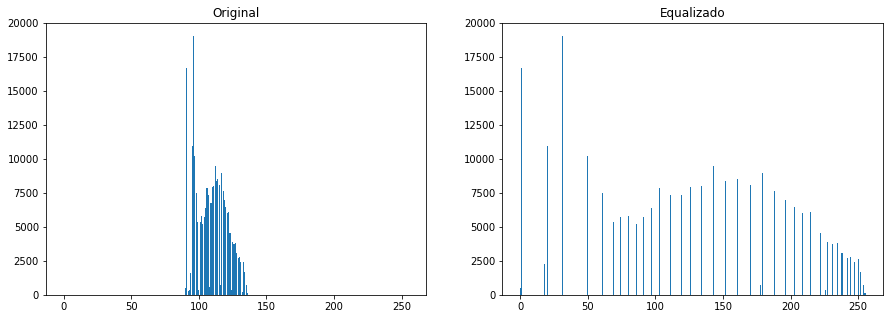

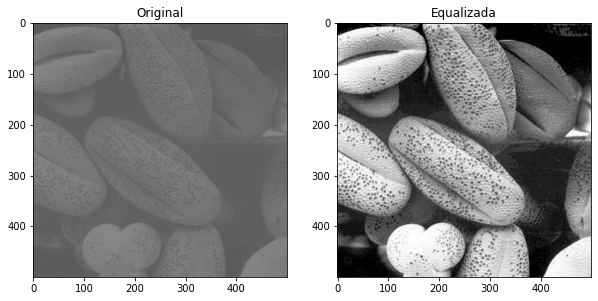

In [26]:
equalized_image = equalize_image(image)

plot_histogram_comparision(image, equalized_image, (
    'Original', 'Equalizado'))

plot_comparision(image, equalized_image, (
    'Original', 'Equalizada'))

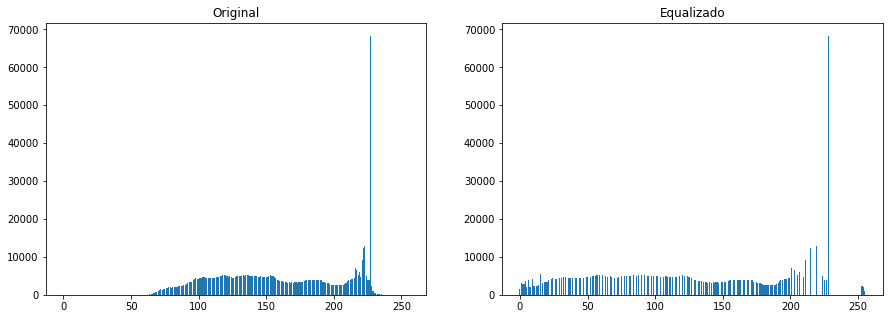

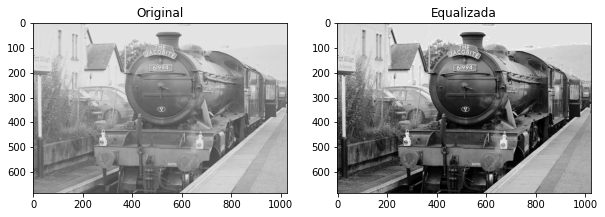

In [27]:
train_image = plt.imread('../images/train.jpg').astype('uint8')
equalized_train_image = equalize_image(train_image)

plot_histogram_comparision(train_image, equalized_train_image, (
    'Original', 'Equalizado'))

plot_comparision(train_image, equalized_train_image, (
    'Original', 'Equalizada'))

In [28]:
import pandas as pd

df = pd.DataFrame(
    [
        [image.mean(), image.var()],
        [equalized_image.mean(), equalized_image.var()],
        [train_image.mean(), train_image.var()],
        [equalized_train_image.mean(), equalized_train_image.var()]
    ], 
    columns=['mean', 'variance'],
    index=[
        'Fig3.15(a)', 'Fig3.15(a) Equalized',
        'Train', 'Train Equalized'])

df

,mean,variance
Fig3.15(a),109.075280,132.202509
Fig3.15(a) Equalized,123.222112,5637.778754
Train,160.770506,2222.043578
Train Equalized,125.532639,5149.587681


Como é possível observar-se, ambas imagens foram visivelmente melhoradas. As imagens originais estavam com as intensidades agrupadas em pequenas áreas, aplicando-se a equalização de histograma nota-se que o algoritmo foi eficiente em espalhar a quantidade de intensidades em todo o conjunto de valores, melhorando-se o contraste final de ambas figuras. 

### Equalização de Histograma Local

In [29]:
def local_equalize_image(image: np.array, mask_size: int = 7) -> np.array:
    """
    Faz a equalização local de histograma da imagem informada.
    """
    from tqdm.autonotebook import tqdm

    M, N = image.shape
    half_mask = mask_size//2
    equalized_image = image.copy()
    
    for i in tqdm(range(0, M - mask_size)):
        for j in range(0, N - mask_size):
            intensities = get_intensities(image[i:i+mask_size, j:j+mask_size])

            # Calcula a probabilidade de cada intensidade na máscara
            probabilities = [n/(mask_size**2) for n in intensities]
            intensity = image[i + half_mask, j+half_mask]
            equalized_image[i + half_mask, j+half_mask] = round(255*sum(probabilities[:intensity + 1]))

    return equalized_image

100%|██████████| 497/497 [00:18<00:00, 27.30it/s]


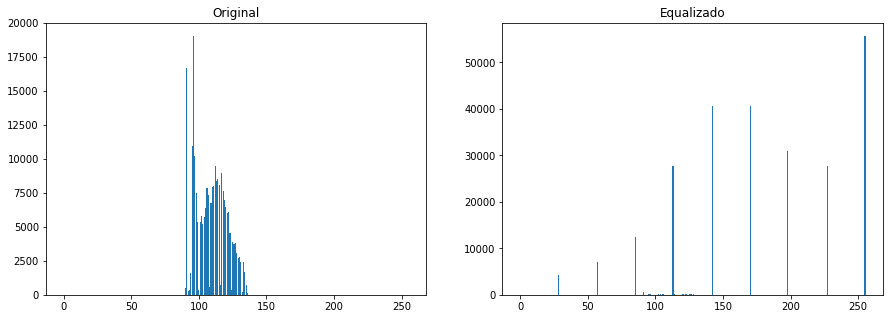

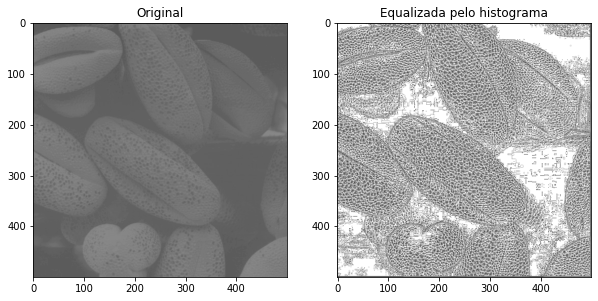

In [30]:
equalized_image = local_equalize_image(image, 3)

plot_histogram_comparision(image, equalized_image, (
    'Original', 'Equalizado'))

plot_comparision(image, equalized_image, (
    'Original', 'Equalizada pelo histograma'))


100%|██████████| 678/678 [01:00<00:00, 11.26it/s]


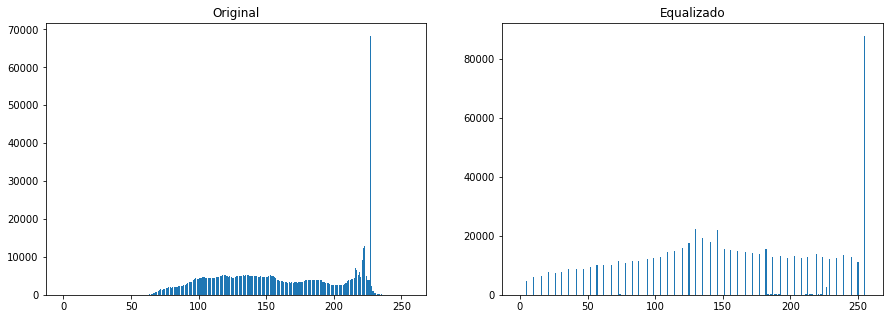

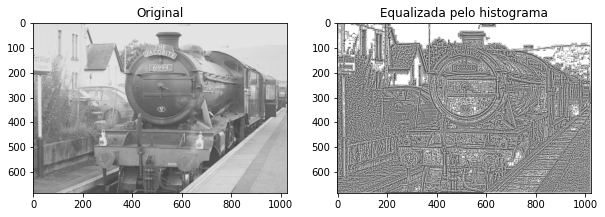

In [31]:
equalized_train_image = local_equalize_image(train_image, 7)

plot_histogram_comparision(train_image, equalized_train_image, (
    'Original', 'Equalizado'))

plot_comparision(train_image, equalized_train_image, (
    'Original', 'Equalizada pelo histograma'))


Em contraste da equalização global, o algoritmo local não obteve bons resultados. É importante notarmos que devido a janela que estamos utilizando ser relativamente pequena (7x7), ao calcularmos as probabilidades acumuladas, acabamos tendo uma grande quantidade de pixels com a mesma intensidade devido a localidade espacial das imagens, resultando em equalizações não muito eficientes.

In [32]:
import pandas as pd

df = pd.DataFrame(
    [
        [image.mean(), image.var()],
        [equalized_image.mean(), equalized_image.var()],
        [train_image.mean(), train_image.var()],
        [equalized_train_image.mean(), equalized_train_image.var()]
    ], 
    columns=['mean', 'variance'],
    index=[
        'Fig3.15(a)', 'Fig3.15(a) Equalized',
        'Train', 'Train Equalized'])

df

,mean,variance
Fig3.15(a),109.075280,132.202509
Fig3.15(a) Equalized,177.319424,3604.359080
Train,160.770506,2222.043578
Train Equalized,154.016728,5115.931917


Para ambos casos, nota-se que a variância aumentou muito, o que era esperado uma vez que a equalização de histograma tende a espalhar as intensidades. Na imagem 'Fig3.15(a)' observa-se que a média aumentou, visto que as intensidades estavam muito agrupadas perto da média, portanto, a equalização de histograma jogou muitos valores para perto de 255. Entretanto, na imagem do trem obtivemos o comportameno oposto, muitos valores estavam com intensidade alta e a equalização jogou os valores para intensidades menores.